# KNN- iris beispiel 



ID — ID field that represents a specific machine.
DATE — The date of the observation.
REGION_CLUSTER — a field that represents the region in which the machine resides.
MAINTENANCE_VENDOR — a field that represents the company that provides maintenance and service to the machine.
MANUFACTURER — the company that manufactured the equipment in question.
WELL_GROUP — a field representing the type of machine.
EQUIPMENT_AGE — Age of the machine, in days.
S15 — A Sensor Value.
S17 — A Sensor Value.
S13 — A Sensor Value.
S16 — A Sensor Value.
S19 — A Sensor Value.
S18 — A Sensor Value.
S8 — A Sensor Value.
EQUIPMENT_FAILURE — A ‘1’ means that the equipment failed. A ‘0’ means the equipment did not fail.
Our first goal in this exercise is to build a model that predicts equipment failure. In other words, we will use the other variables in the data frame to predict EQUIPMENT_FAILURE.




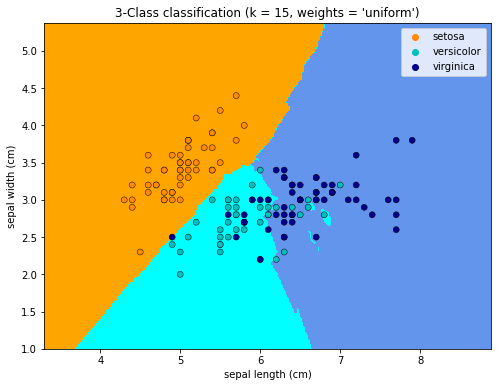

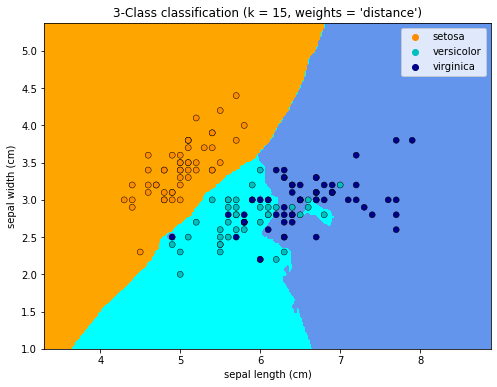

In [146]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()

In [147]:
len(y)

150

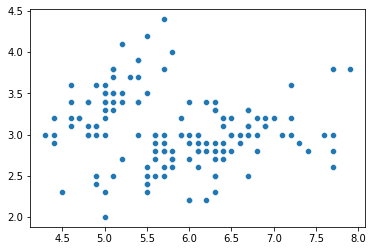

In [148]:
X = iris.data[:, :2]
sns.scatterplot(x=X[:, 0],y=X[:, 1])

In [176]:
# hole sensor daten
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/IBM/iot-predictive-analytics/master/data/iot_sensor_dataset.csv"
df_iotdata=pd.read_csv(url,error_bad_lines=False)
df_iotdata.head()

Xiot=df_iotdata[["footfall",	"atemp"	,"selfLR"	,"ClinLR"	,"DoleLR"	,"PID",	"outpressure",	"inpressure",	"temp"]]
#X=df_iotdata[["footfall","outpressure"]]


y_target_iot=df_iotdata['fail']
y_target_iot.head()

#X.head()

0    1
1    0
2    0
3    0
4    0
Name: fail, dtype: int64

In [150]:
#https://github.com/Starignus/AppliedML_Python_Coursera/blob/master/adspy_shared_utilities.py

# KNN- neues beispiel sensor data

In [151]:
sensor = pd.read_csv('https://raw.githubusercontent.com/shadgriffin/machine_failure/master/equipment_failure_data_1.csv')
sensor.head()


#,"DoleLR"	,"PID",	"outpressure",	"inpressure",	"temp"]]

ys_failure=sensor['EQUIPMENT_FAILURE']==1
ys_no_failure=sensor['EQUIPMENT_FAILURE']==0
sensor_failure=sensor[ys_failure].truncate(after=3000)
sensor_no_failure=sensor[ys_no_failure].truncate(after=3)

#sensor_no_failure.head(30)

sensor_failure_all= sensor_failure.append(sensor_no_failure)
sensor_failure_all.head(20)
sensor_failure_all

Xs=sensor_failure_all[["S15",	"S16"	]]	
ys=sensor_failure_all['EQUIPMENT_FAILURE']
Xs.head(20)

,S15,S16
143,0.000000,8.892400
1452,0.000000,8.704800
1974,0.000000,3.282400
2882,0.000000,3.731000
2940,0.000000,8.413200
0,11.088000,8.426869
1,8.877943,6.483714
2,8.676444,6.159659
3,9.988338,9.320308


In [152]:

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fruits = pd.read_table('https://raw.githubusercontent.com/Starignus/AppliedML_Python_Coursera/master/fruit_data_with_colors.txt')
#fruits.head(20)

In [153]:
#fruits.describe()

In [154]:
#scoring knn classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00


In [155]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split



#Xiot=df_iotdata[["footfall",	"atemp"	,"selfLR"	,"ClinLR"	,"DoleLR"	,"PID",	"outpressure",	"inpressure",	"temp"]]
X=Xs  #.truncate(after=10)

#X = fruits[['mass', 'width', 'height', 'color_score']]
#y = fruits['fruit_label']
y=ys  #.truncate(after=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_knn(X, y, n_neighbors, weights):

    # as matrix set data its imßpoort for datframes
    X_mat = X.as_matrix()
    y_mat = y.as_matrix()

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='failure')
    patch1 = mpatches.Patch(color='#00FF00', label='normal')
   
    plt.legend(handles=[patch0, patch1])

        
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("4-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    
    plt.show()

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


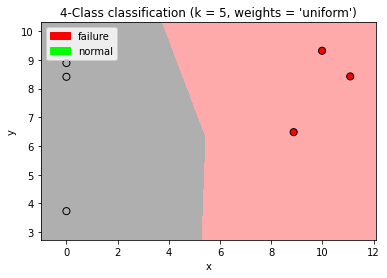

In [156]:
#call above function with kkn =5
#plot the knn with scatter plot
plot_fruit_knn(X_train, y_train, 5, 'uniform')

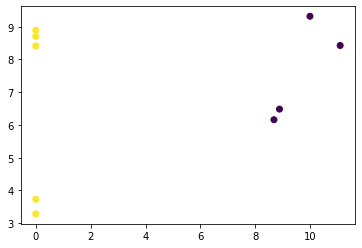

In [157]:
#original scatter plot
plt.scatter(Xs.iloc[:, 0],Xs.iloc[:, 1], c=ys)

In [158]:
#scoring knn classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))


#plot y_pred as well
y_hat=knn.predict(X_test)
print("ypred: ", y_hat)
print("xtest: ", X_test)
print(" ytest: ",y_test)

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00
ypred:  [0 1 1]
xtest:             S15       S16
2     8.676444  6.159659
1974  0.000000  3.282400
1452  0.000000  8.704800
 ytest:  2       0
1974    1
1452    1
Name: EQUIPMENT_FAILURE, dtype: int64


In [159]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1 0]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [160]:
X_test.shape
X_train.shape

(6, 2)

In [161]:
Xs.iloc[:, 0].shape

(9,)

# preprocessing the data and exploring - corelation matrix

In [162]:
sensor_pre = pd.read_csv('https://raw.githubusercontent.com/shadgriffin/machine_failure/master/equipment_failure_data_1.csv')
sensor_pre.head()
sensor_pre#.drop('EQUIPMENT_FAILURE', axis=1)

#,"DoleLR"	,"PID",	"outpressure",	"inpressure",	"temp"]]

ys_pre=sensor_pre['EQUIPMENT_FAILURE']
sensor_pre.columns
Xsensor_pre= sensor_pre[['ID', 'DATE', 'REGION_CLUSTER', 'MAINTENANCE_VENDOR', 'MANUFACTURER', 'WELL_GROUP', 'S15', 'S17', 'S13', 'S5', 'S16', 'S19', 'S18', 'S8', 'AGE_OF_EQUIPMENT']]
Xsensor_pre.shape

(149855, 15)

In [163]:
#https://medium.com/swlh/machine-learning-for-equipment-failure-prediction-and-predictive-maintenance-pm-e72b1ce42da1

"""

ID — ID field that represents a specific machine.
DATE — The date of the observation.
REGION_CLUSTER — a field that represents the region in which the machine resides.
MAINTENANCE_VENDOR — a field that represents the company that provides maintenance and service to the machine.
MANUFACTURER — the company that manufactured the equipment in question.
WELL_GROUP — a field representing the type of machine.
EQUIPMENT_AGE — Age of the machine, in days.
S15 — A Sensor Value.
S17 — A Sensor Value.
S13 — A Sensor Value.
S16 — A Sensor Value.
S19 — A Sensor Value.
S18 — A Sensor Value.
S8 — A Sensor Value.
EQUIPMENT_FAILURE — A ‘1’ means that the equipment failed. A ‘0’ means the equipment did not fail.
Our first goal in this exercise is to build a model that predicts equipment failure. In other words, we will use the other variables in the data frame to predict EQUIPMENT_FAILURE.

"""

sensor_pre.describe()

,ID,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
count,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000
mean,100320.419512,2.497561,14.185534,85.918460,35.643733,4557.518000,7.925408,8.229842,110.082879,0.001368,117.481750,2751.146341
std,178.503502,1.093775,8.665254,85.572229,14.723678,2497.993986,2.426462,13.041714,197.356230,0.036961,204.107481,3368.354905
min,100001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.490000,0.000000
25%,100164.000000,2.000000,7.548000,0.000000,28.250000,3193.000000,6.596000,0.900000,11.300000,0.000000,8.660000,755.000000
50%,100328.000000,2.000000,11.077500,95.480000,35.020000,4224.000000,8.025600,4.200000,34.000000,0.000000,44.320000,1143.000000
75%,100472.000000,3.000000,22.080000,163.660000,41.940833,5615.000000,9.480700,10.500000,118.900000,0.000000,135.080000,3224.500000
max,100612.000000,4.000000,51.225600,478.470000,570.510000,52767.000000,23.533800,291.100000,3995.900000,1.000000,1824.960000,15170.000000


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


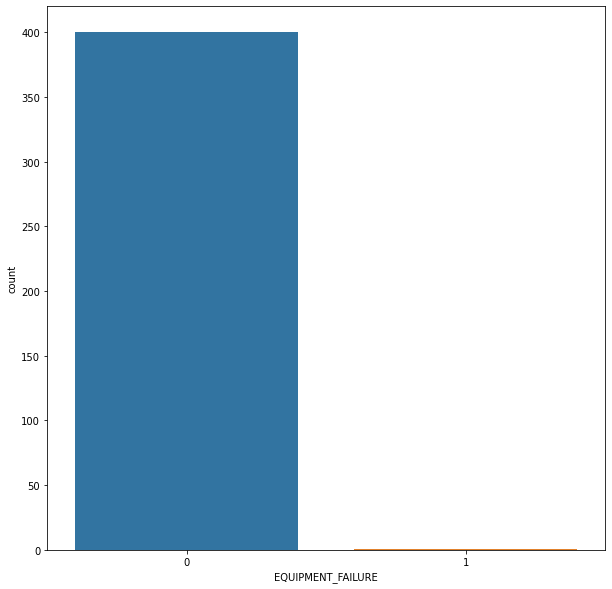

In [164]:
# hist the sensor data failure-distribution

import seaborn as sns
plt.figure(figsize=(10,10))
sensor_preS5=sensor_pre.truncate( after=400)

sns.countplot(sensor_preS5['EQUIPMENT_FAILURE'],label="Count")
plt.show()

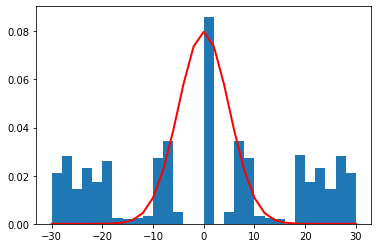

In [165]:
#plot gaussian distribution

mu, sigma = 0, 5 # mean and standard deviation
#s = np.random.normal(mu, sigma, 1000)

s=sensor_preS5['S15'].append(- sensor_preS5['S15'])

abs(mu - np.mean(s))
abs(sigma - np.std(s, ddof=1))
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


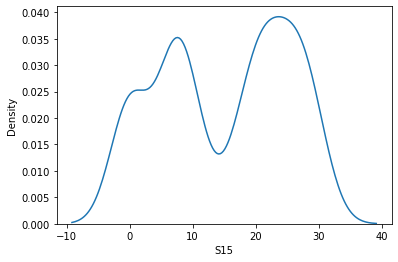

In [166]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(sensor_preS5['S15'], hist=False)

plt.show()

In [167]:
#check how many failures
sens_failure=sensor_pre[sensor_pre['EQUIPMENT_FAILURE']==1]
sens_failure.shape

(205, 16)

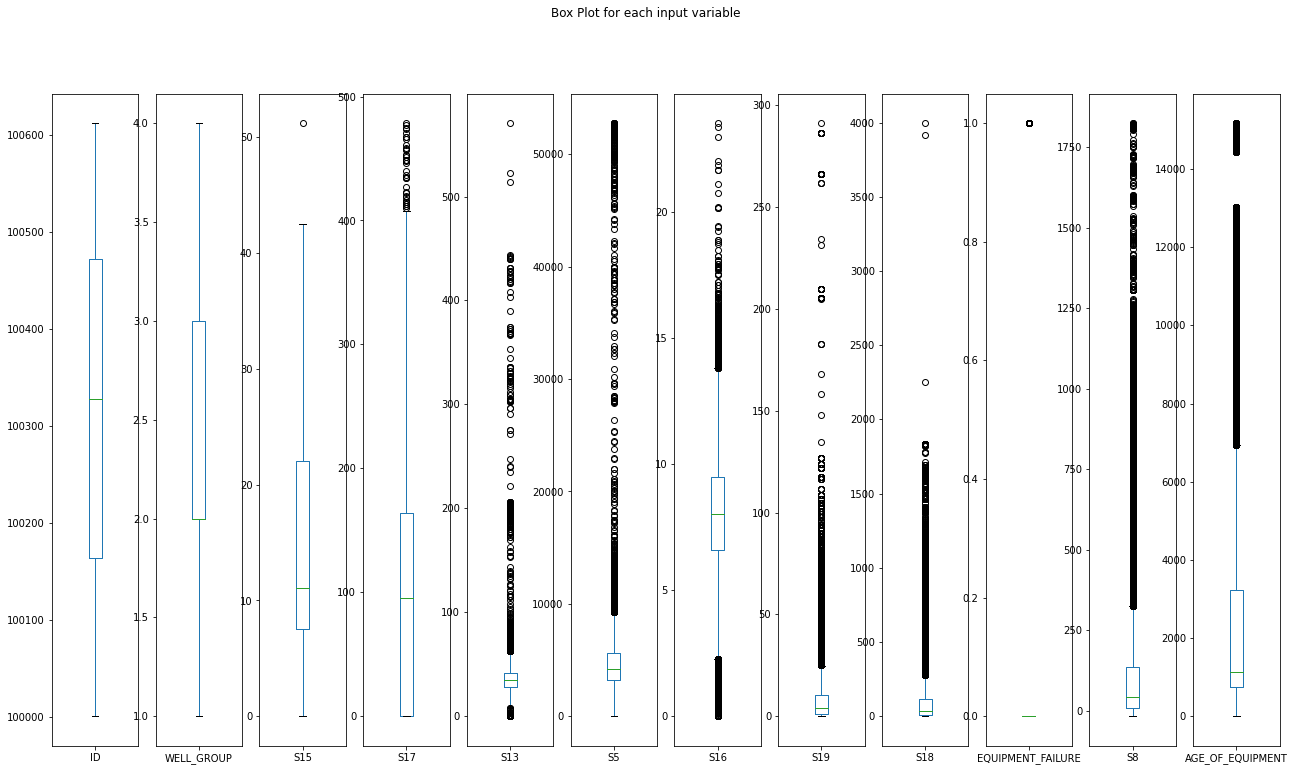

In [168]:
#box plot for each input feature
sensor_pre.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(22,12), 
                                        title='Box Plot for each input variable')
plt.savefig('fruits_boxplot')
plt.show()

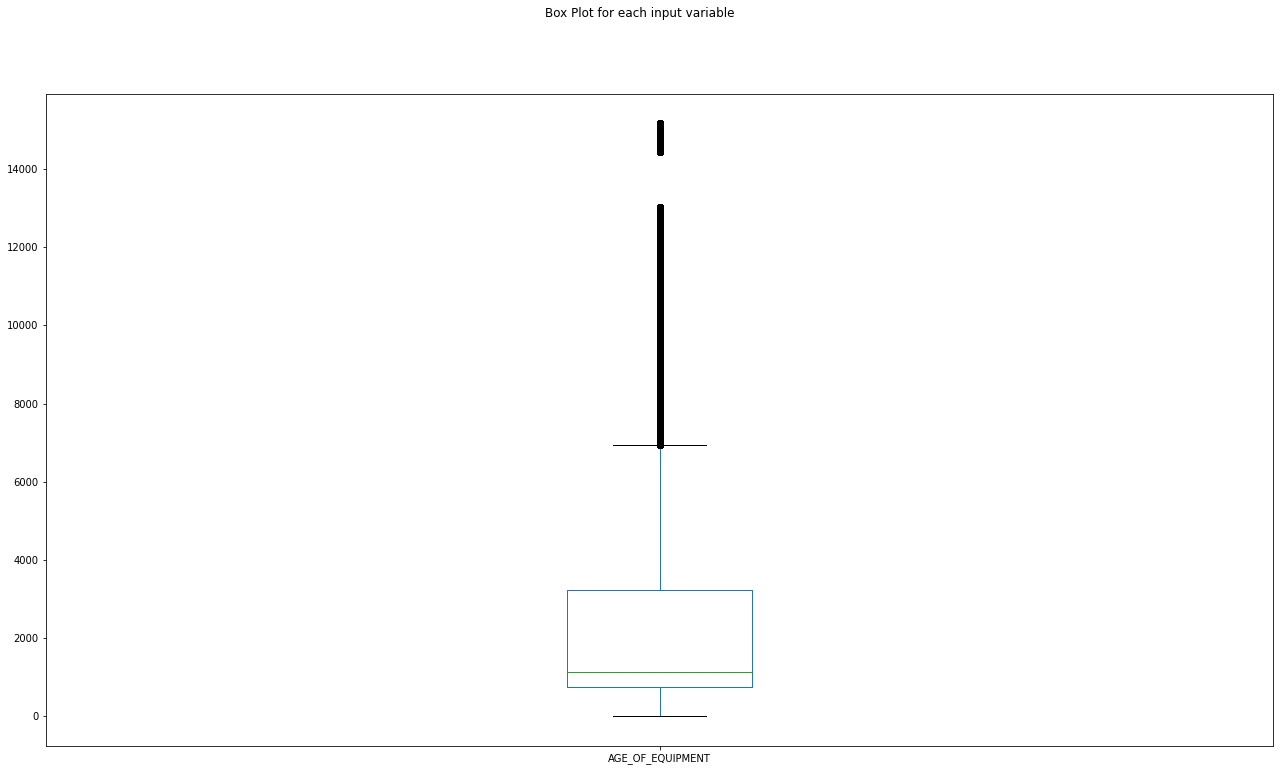

In [169]:
sensor_pre["AGE_OF_EQUIPMENT"].plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(22,12), 
                                        title='Box Plot for each input variable')
#plt.savefig('fruits_boxplot')
plt.show()

In [170]:
import statistics
statistics.median(sensor_pre["AGE_OF_EQUIPMENT"])

1143

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/anaconda/envs/azureml_py3

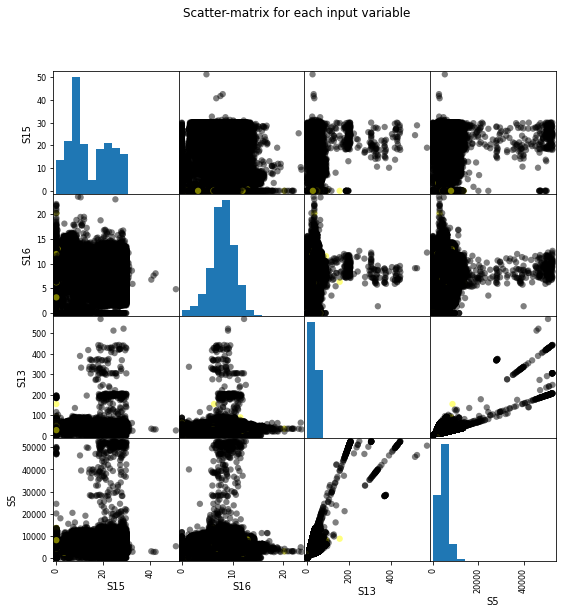

In [177]:
# plot scatter_matrix with failkure as color
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(Xsensor_pre[[ 'S15', 'S16', 'S13', 'S5']], c=ys_pre, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

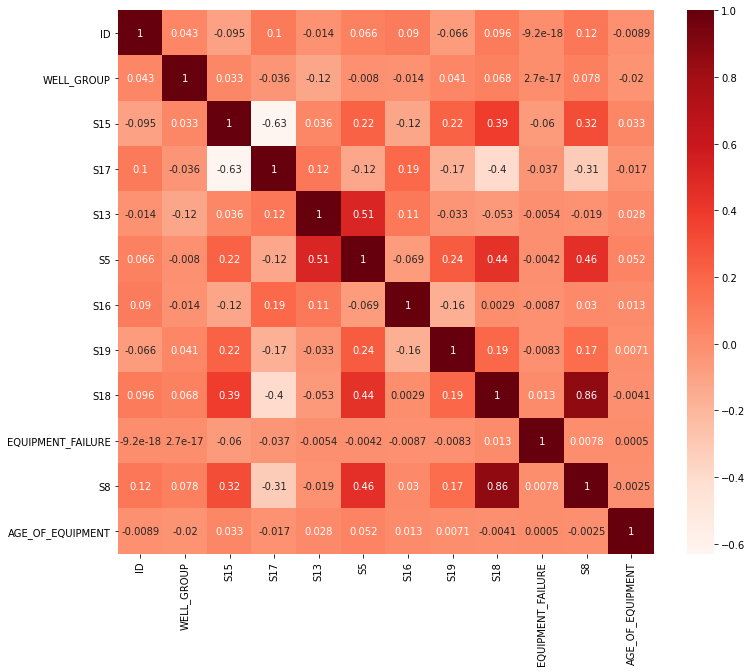

In [172]:
#Using Pearson Correlation
import seaborn as sns

plt.figure(figsize=(12,10))
cor = sensor_pre.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [173]:
#Correlation with output variable
cor_target = (cor["EQUIPMENT_FAILURE"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.0001]
relevant_features

relevant_features.sort_values( ascending=False)

EQUIPMENT_FAILURE    1.000000
S18                  0.012836
S8                   0.007830
AGE_OF_EQUIPMENT     0.000499
Name: EQUIPMENT_FAILURE, dtype: float64

([<matplotlib.axis.XTick at 0x7fabc1bd8b70>,
 <a list of 5 Text major ticklabel objects>)

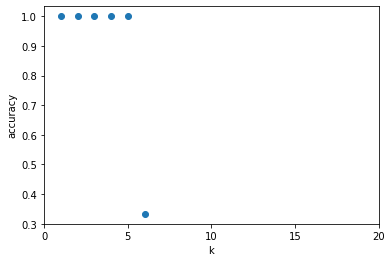

In [174]:
#find optimal accuracy for number of Ks and plot by accuray
k_range = range(1, 7)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

# svc classification

In [191]:
from sklearn import svm

#Create a svm Classifier
#kernel ooption _ linear, rbf, Polynomial 
clf = svm.SVC(C=1.0, kernel='poly', degree=3, gamma=2) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(Xs)
score=clf.score(X_test, y_test)
score

1.0

In [192]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

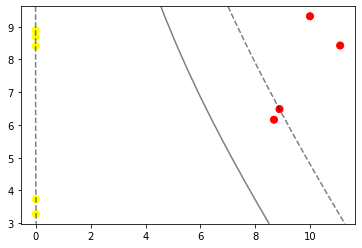

In [194]:
plt.scatter(Xs.iloc[:, 0],Xs.iloc[:, 1], c=ys,s=50, cmap='autumn')
plot_svc_decision_function(clf);

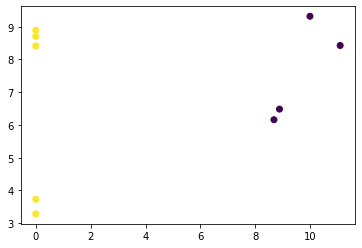

In [178]:
#original scatter plot
plt.scatter(Xs.iloc[:, 0],Xs.iloc[:, 1], c=ys)

In [195]:
#plot_fruit_knn(X_train, y_train, 5, 'uniform')